<i>Configuracao

In [75]:
%pip install numpy scikit-fuzzy matplotlib

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<h3> Definição do Problema

<i>A UBER está reformulando seu aplicativo para que possa mensurar melhor a qualidade de seus motoristas de acordo com a experiência do cliente.  Para isso, a empresa contratou você para estudar quais aspectos são mais relevantes na avaliação de um motorista e desenvolver um sistema Fuzzy que incorpore o estudo realizado. 

Como requisito, a UBER solicitou que:
A nota final do motorista seja considerada no intervalo de 0 à 5
Sejam consideradas na modelagem no mínimo 4 variáveis linguísticas (sendo uma delas a nota).
Cada variável linguística deve ter no mínimo 3 conjuntos fuzzy.
O sistema deve ter no mínimo 5 regras de inferência. 

O Pesquisador está livre para definir quais variáveis linguísticas serão utilizadas em seu sistema. Estudos sugerem que fatores como “Limpeza do automóvel”, “Educação do motorista”,” Direção Segura”, entre outros, são os pontos mais considerados para avaliar positivamente ou negativamente um motorista.
O Pesquisador está livre para construir as regras de inferência de acordo com a sua experiência. 


<h5> Variáveis Linguísticas e Conjuntos Fuzzy

* Nota

In [100]:
nota = ctrl.Consequent(np.arange(0,5,0.2),'nota')

In [112]:
nota['1']=fuzz.gaussmf(nota.universe,1,1)
nota['2']=fuzz.gaussmf(nota.universe,1,5)
nota['3']=fuzz.gaussmf(nota.universe,1,5)
nota['4']=fuzz.gaussmf(nota.universe,1,5)
nota['5']=fuzz.gaussmf(nota.universe,5,1)

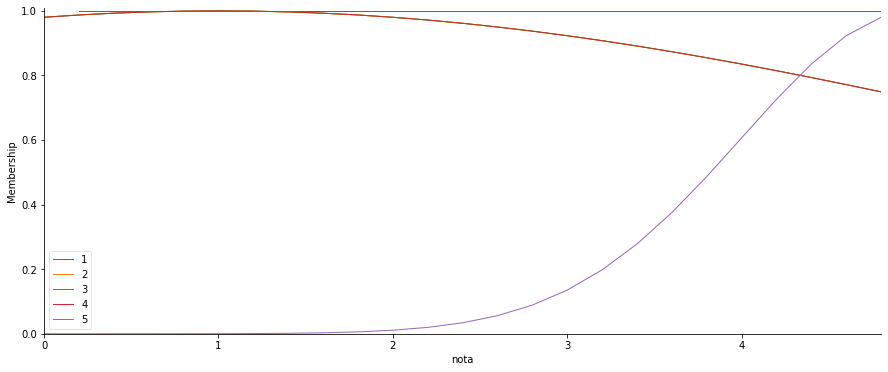

In [111]:
nota.view()

* Caminho Escolhido

In [79]:
caminho_escolhido = ctrl.Antecedent(np.arange(0,11,0.2),'caminho_escolhido')

In [80]:
caminho_escolhido['ruim']=fuzz.trimf(caminho_escolhido.universe,[0,0,5])
caminho_escolhido['médio']=fuzz.trimf(caminho_escolhido.universe,[0,5,10])
caminho_escolhido['bom']=fuzz.trimf(caminho_escolhido.universe,[5,10,1000])

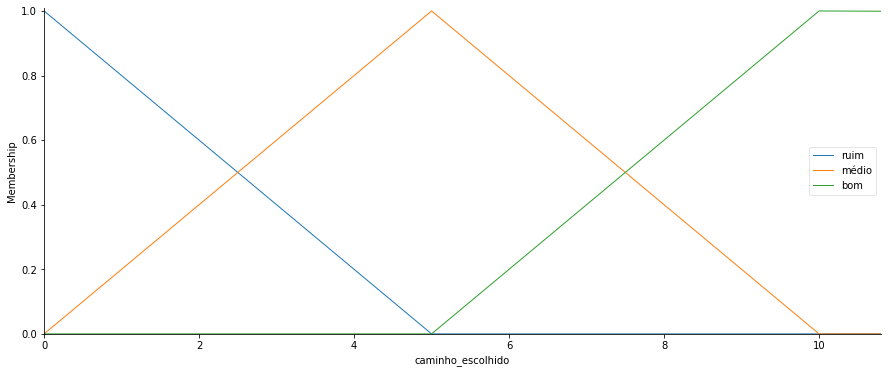

In [81]:
caminho_escolhido.view()

* Cordialidade

In [82]:
cordialidade = ctrl.Antecedent(np.arange(0,11,0.2),'cordialidade')

In [83]:
cordialidade['baixa']=fuzz.trimf(cordialidade.universe,[0,0,5])
cordialidade['média']=fuzz.trimf(cordialidade.universe,[0,5,10])
cordialidade['alta']=fuzz.trimf(cordialidade.universe,[5,10,1000])

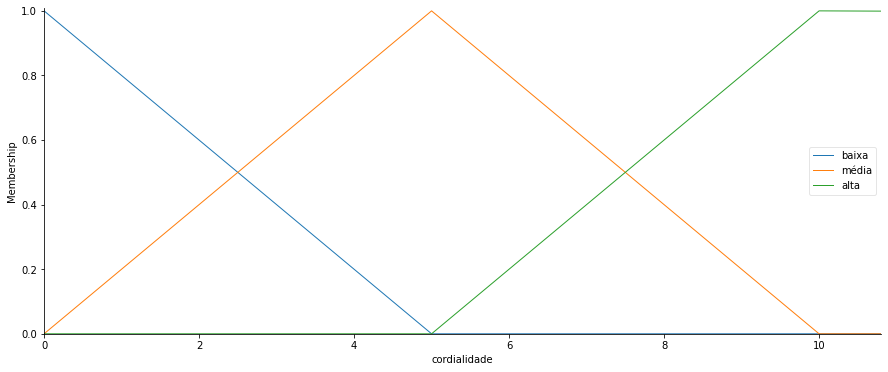

In [84]:
cordialidade.view()

* Direcao

In [85]:
direcao = ctrl.Antecedent(np.arange(0,11,0.2),'direcao')

In [86]:
direcao['ruim']=fuzz.trimf(direcao.universe,[0,0,5])
direcao['média']=fuzz.trimf(direcao.universe,[0,5,10])
direcao['boa']=fuzz.trimf(direcao.universe,[5,10,1000])

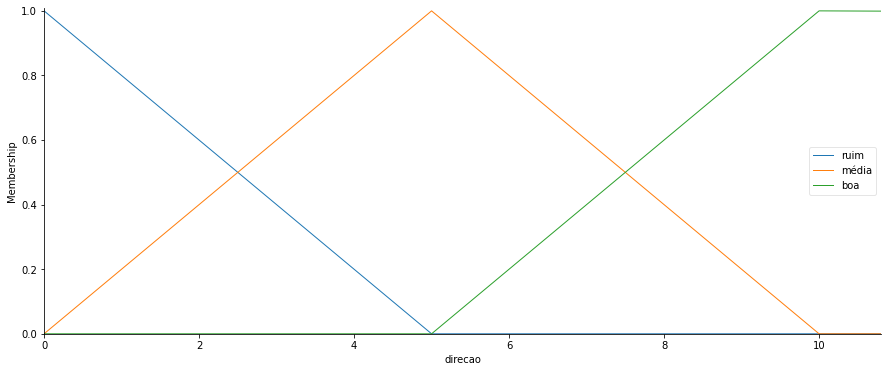

In [87]:
direcao.view()

<h5> Regras de inferencia

Considerando as variáveis:

* Caminho escolhido
* Cordialidade
* Direcao

In [88]:
rule1=ctrl.Rule(direcao['ruim'] & caminho_escolhido['ruim'] & cordialidade['baixa'], nota['1'])
rule2=ctrl.Rule(direcao['ruim'] & caminho_escolhido['ruim'] & cordialidade['média'], nota['2'])
rule3=ctrl.Rule(direcao['ruim'] & caminho_escolhido['médio'] & cordialidade['alta'], nota['3'])
rule4=ctrl.Rule(direcao['ruim'] & caminho_escolhido['médio'] & cordialidade['baixa'], nota['2'])
rule5=ctrl.Rule(direcao['média'] & caminho_escolhido['bom'] & cordialidade['média'], nota['3'])
rule6=ctrl.Rule(direcao['média'] & caminho_escolhido['bom'] & cordialidade['alta'], nota['4'])
rule7=ctrl.Rule(direcao['média'] & caminho_escolhido['ruim'] & cordialidade['baixa'], nota['2'])
rule8=ctrl.Rule(direcao['média'] & caminho_escolhido['ruim'] & cordialidade['média'], nota['3'])
rule9=ctrl.Rule(direcao['boa'] & caminho_escolhido['médio'] & cordialidade['alta'], nota['4'])
rule10=ctrl.Rule(direcao['boa'] & caminho_escolhido['médio'] & cordialidade['baixa'], nota['3'])
rule11=ctrl.Rule(direcao['boa'] & caminho_escolhido['bom'] & cordialidade['média'], nota['4'])
rule12=ctrl.Rule(direcao['boa'] & caminho_escolhido['bom'] & cordialidade['alta'], nota['5'])

In [89]:
agreg=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6, rule7, rule8, rule9,rule10,rule11,rule12 ])

In [90]:
controle=ctrl.ControlSystemSimulation(agreg)

<h5> Execução

In [91]:
controle.input['direcao']=7
controle.input['caminho_escolhido']=4.75
controle.input['cordialidade']=7
controle.compute()

In [92]:
print(controle.output['nota'])

5.077076275536393


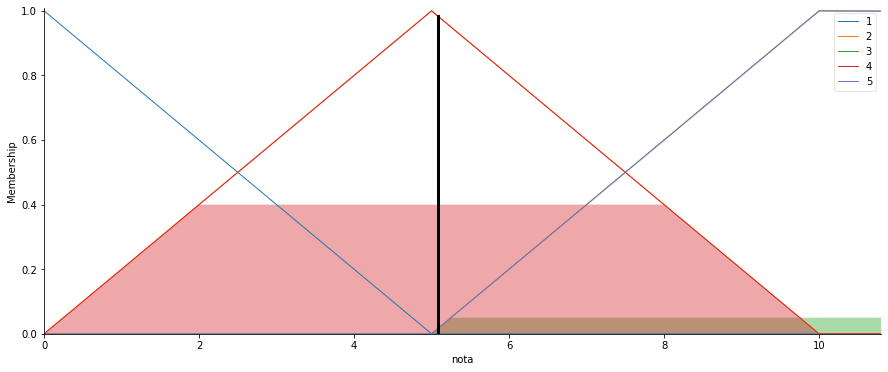

In [93]:
nota.view(sim=controle)